In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Load dataset
df = pd.read_csv("Test_data.csv")  # Ensure correct path


In [ ]:
# Encode categorical features
categorical_cols = ['protocol_type', 'service', 'flag']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
# Normalize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
# Generate pseudo-labels using K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['label'] = kmeans.fit_predict(df_scaled)

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['label'], test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# Train Neural Network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int).flatten()

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9598 - loss: 0.1266
Epoch 2/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9984 - loss: 0.0049
Epoch 3/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9988 - loss: 0.0039
Epoch 4/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9987 - loss: 0.0032
Epoch 5/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9991 - loss: 0.0030
Epoch 6/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9988 - loss: 0.0028
Epoch 7/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9984 - loss: 0.0027
Epoch 8/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9987 - loss: 0.0028
Epoch 9/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9988 - loss: 0.0037
Epoch 10/10
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9986 - loss: 0.0029
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluation for {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Evaluation for Random Forest
Accuracy: 0.9991128853404303
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       964
           1       1.00      1.00      1.00      3545

    accuracy                           1.00      4509
   macro avg       1.00      1.00      1.00      4509
weighted avg       1.00      1.00      1.00      4509



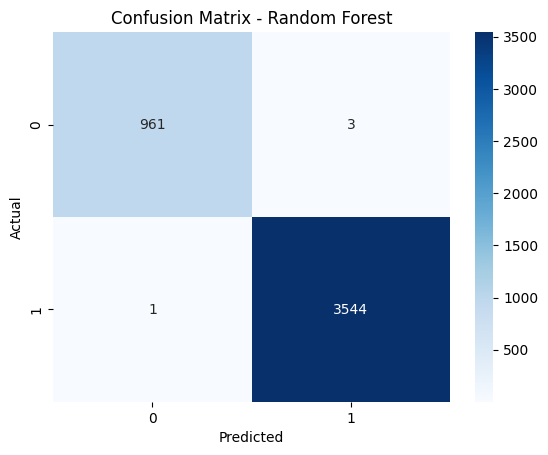

In [ ]:
# Run evaluation
evaluate_model(y_test, y_pred_rf, "Random Forest")



Evaluation for SVM
Accuracy: 0.9986693280106453
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       964
           1       1.00      1.00      1.00      3545

    accuracy                           1.00      4509
   macro avg       1.00      1.00      1.00      4509
weighted avg       1.00      1.00      1.00      4509



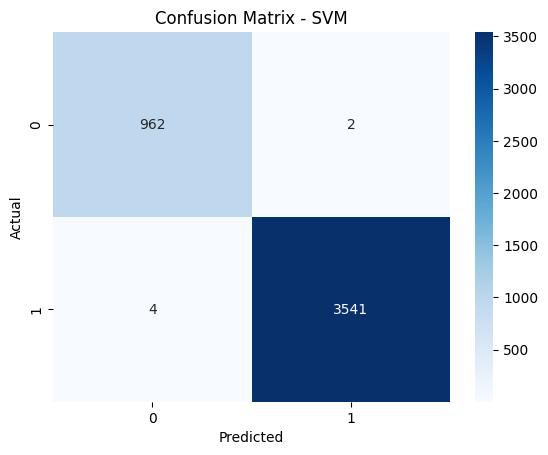

In [ ]:
evaluate_model(y_test, y_pred_svm, "SVM")


Evaluation for Neural Network
Accuracy: 0.998447549345753
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       964
           1       1.00      1.00      1.00      3545

    accuracy                           1.00      4509
   macro avg       1.00      1.00      1.00      4509
weighted avg       1.00      1.00      1.00      4509



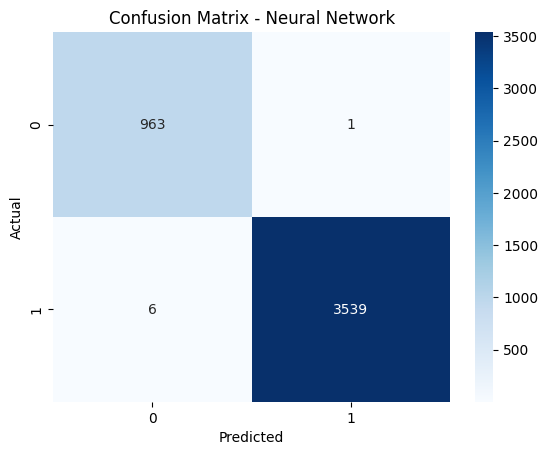

In [ ]:
evaluate_model(y_test, y_pred_nn, "Neural Network")